In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##Üçüncü case Uygulamanın başlatılıp initialdistance değerinni alındıktan sonra 5-10 saniye sonra karanlık ortamda cihazın ortamla beraber(çanta) hareket
##ettirilmesi ve döndürülmesi Kamerayı karanlık ortamdan çıkardıktan sonra küp aynı yerde değildi sonrasında düzeltme yaparak olması gereken yere geçti.
## 15. saniyede karanlık ortama soktuk

In [30]:
df = pd.read_csv('DistanceLogTest3.csv')



In [31]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,3.48,0.0,1.5,1.5,-0.0153,1.5130,-0.0149,1.5151,0.0000,1.5151
1,3.58,0.0,1.5,1.5,-0.0143,1.5147,-0.0167,1.5168,0.0017,1.5151
2,3.70,0.0,1.5,1.5,-0.0127,1.5175,-0.0194,1.5195,0.0045,1.5151
3,3.83,0.0,1.5,1.5,-0.0105,1.5208,-0.0238,1.5240,0.0089,1.5151
4,3.94,0.0,1.5,1.5,-0.0088,1.5220,-0.0267,1.5268,0.0118,1.5151


In [32]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,517.000000,517.0,517.0,517.0,517.000000,517.000000,517.000000,516.000000,516.000000,5.160000e+02
mean,34.422785,0.0,1.5,1.5,0.375560,1.298646,0.205889,1.416212,-0.098861,1.515100e+00
std,17.881631,0.0,0.0,0.0,0.290128,0.162742,0.262863,0.173983,0.173984,2.222601e-16
min,3.480000,0.0,1.5,1.5,-0.055800,1.079700,-0.318400,1.255300,-0.259700,1.515100e+00
25%,18.970000,0.0,1.5,1.5,0.000600,1.174100,-0.064700,1.284000,-0.231000,1.515100e+00
50%,34.470000,0.0,1.5,1.5,0.597600,1.182300,0.401400,1.290450,-0.224600,1.515100e+00
75%,49.900000,0.0,1.5,1.5,0.599700,1.491100,0.411700,1.567025,0.051950,1.515100e+00
max,64.850000,0.0,1.5,1.5,0.653400,1.629700,0.469500,1.819500,0.304400,1.515100e+00


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             517 non-null    float64
 1   ObjectX          517 non-null    float64
 2   ObjectY          517 non-null    float64
 3   ObjectZ          517 non-null    float64
 4   CameraX          517 non-null    float64
 5   CameraY          517 non-null    float64
 6   CameraZ          517 non-null    float64
 7   Distance         516 non-null    float64
 8   DeltaDistance    516 non-null    float64
 9   InitialDistance  516 non-null    float64
dtypes: float64(10)
memory usage: 40.5 KB


In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [36]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

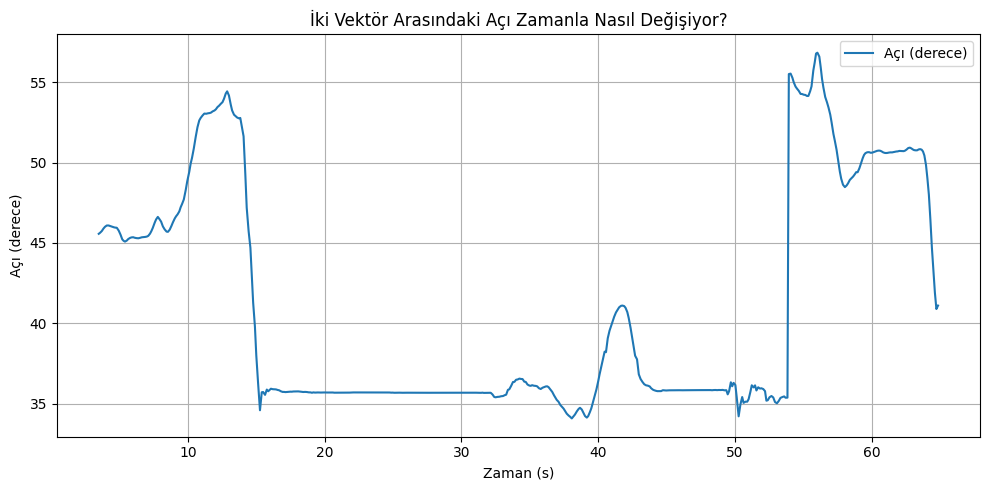

In [37]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

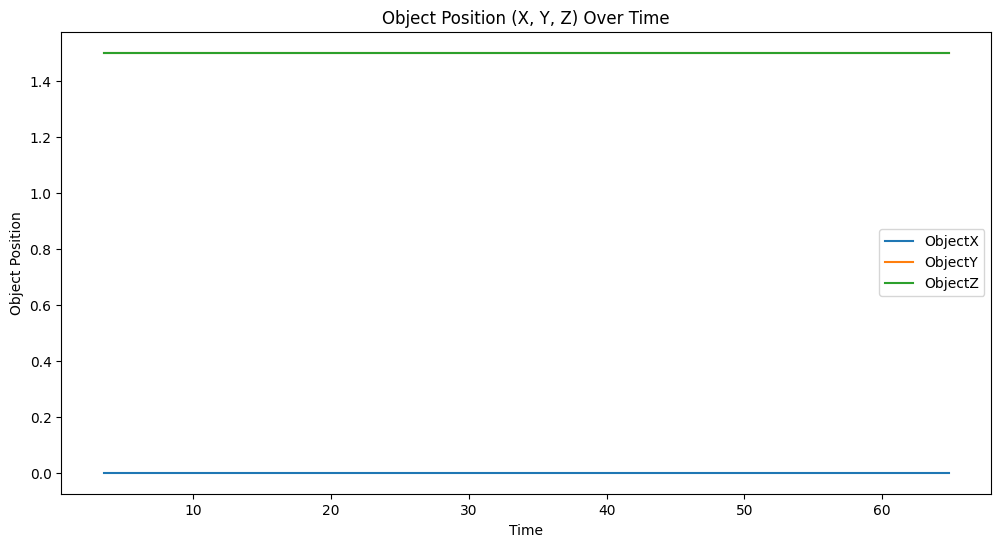

In [38]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

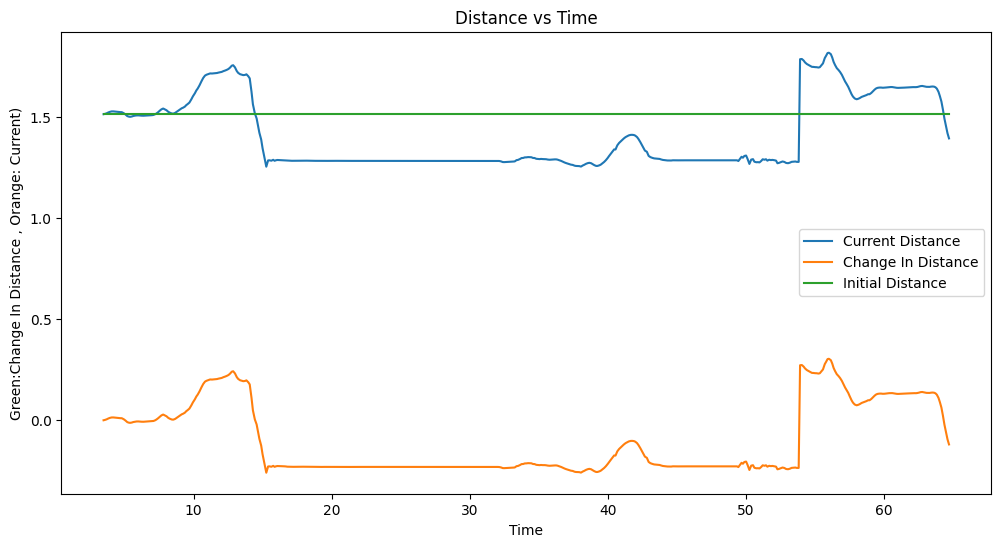

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






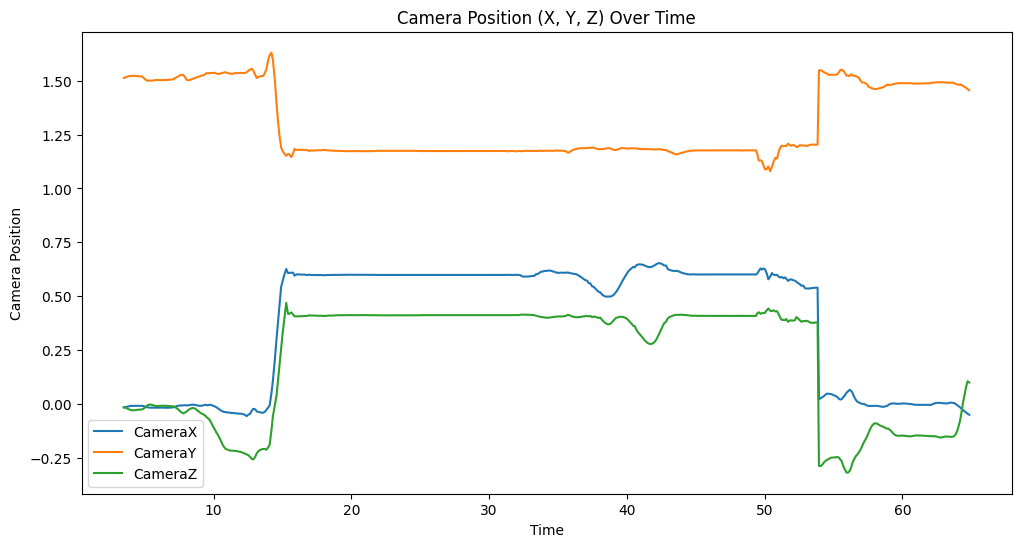

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

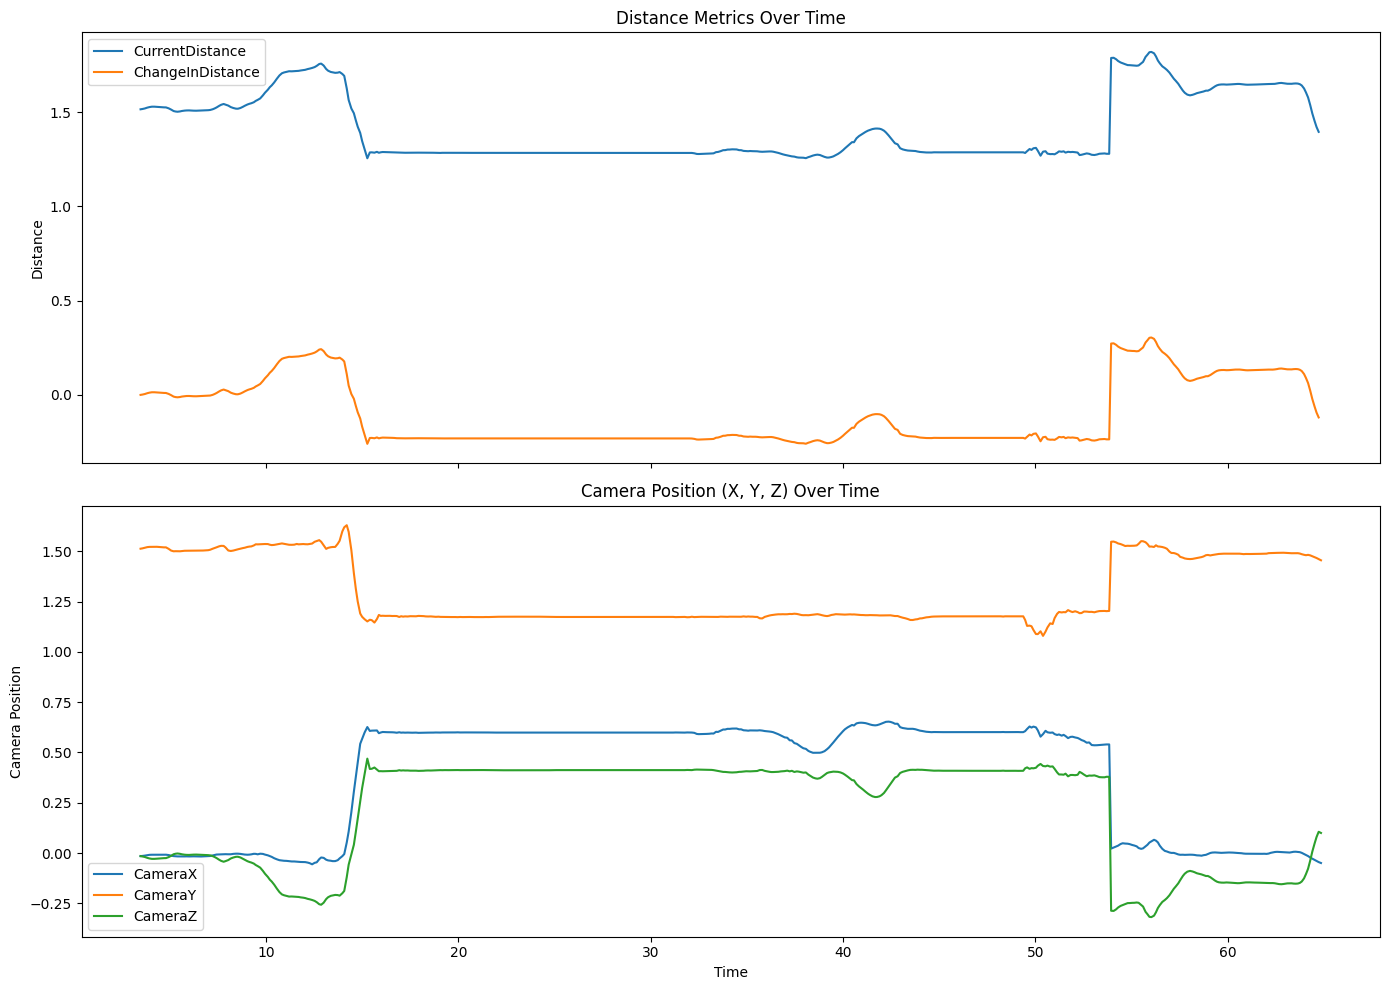

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()